# **Practical 4: Write a program to visualize the most frequent words used in the dataset.**

In [ ]:
!pip install pandas matplotlib wordcloud nltk

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import re
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Social\ Media\ Analytics/amazon-fine-food-reviews.zip

Archive:  /content/drive/MyDrive/Social Media Analytics/amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
# Read in data
df = pd.read_csv(f'/content/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [ ]:
# Preprocess the review text
def preprocess_text(text):
    text = text.lower()
    # Remove non-alphabetic characters (keep words only)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_review'] = df['Text'].apply(preprocess_text)

In [ ]:
# Get a list of all words in the dataset
all_words = ' '.join(df['cleaned_review']).split()

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]

In [ ]:
# Count the frequency of each word using Counter
word_counts = Counter(filtered_words)

# Get the most common words (top 20 most frequent words)
most_common_words = word_counts.most_common(20)

# Extract the words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

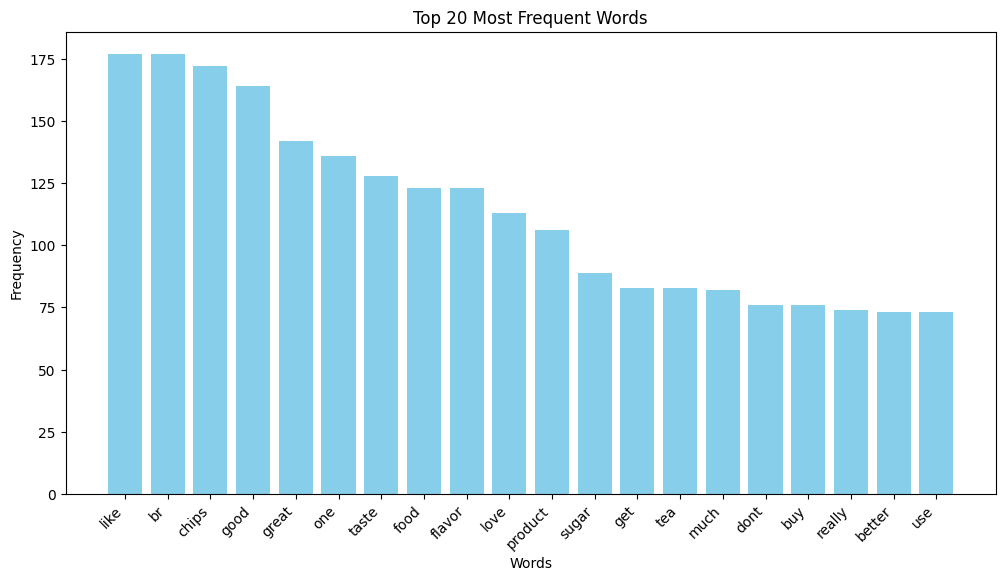

In [ ]:
# bar plot of the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()

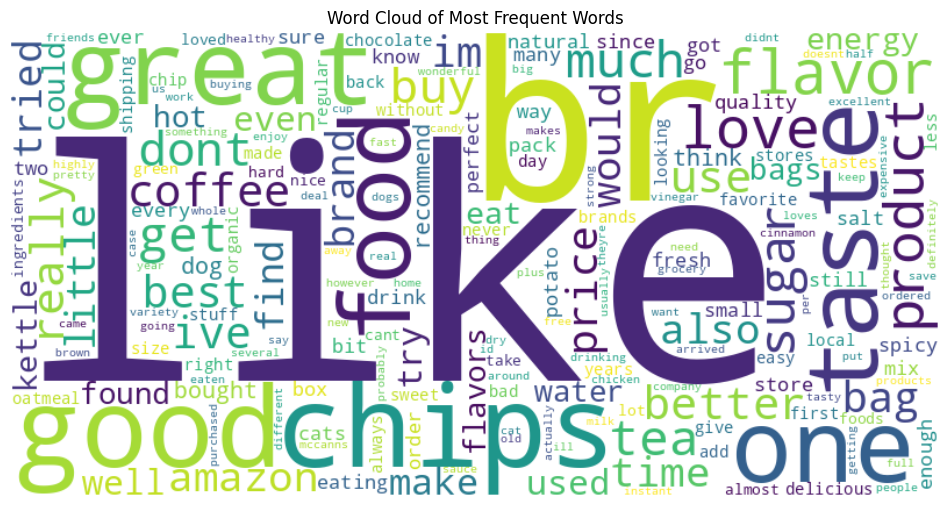

In [ ]:
# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


# **Conclusion**

The Notebook effectively demonstrates the process of extracting, preprocessing, and visualizing text data to identify the most frequently used words in a dataset. By employing popular Python libraries such as pandas for data handling, nltk for text preprocessing, and matplotlib and wordcloud for visualization, the workflow provides valuable insights into textual trends.